In [2]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd


od.download('https://www.kaggle.com/datasets/arjunvankani/recommendation-system-challenge-music-suggestion')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: srushtibhagchandani
Your Kaggle Key: ··········


100%|██████████| 709M/709M [00:08<00:00, 89.0MB/s]


In [2]:
import pandas as pd

# Assuming you have the following files: 'train.csv', 'test.csv', 'songs.csv', 'members.csv', 'song_extra_info.csv'
train = pd.read_csv('/content/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/train.csv/train.csv')
test = pd.read_csv('/content/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/test.csv/test.csv')
songs = pd.read_csv('/content/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/songs.csv/songs.csv')
members = pd.read_csv('/content/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/members.csv/members.csv')
song_extra_info = pd.read_csv('/content/recommendation-system-challenge-music-suggestion/recommendation challenge (Music)/song_extra_info.csv/song_extra_info.csv')

In [4]:
# Print the first few rows of the train dataset
print(train.head())

# Check for missing values
print(train.isnull().sum())

# Summary statistics for numerical features
print(train.describe())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1  
3  Local playlist more   local-playlist       1  
4              Explore  onli

#Handling Missing Values

In [3]:
# Columns to be removed
columns_to_remove = ['source_system_tab', 'source_screen_name', 'source_type']

# Remove the columns from the train dataset
train.drop(columns=columns_to_remove, axis=1, inplace=True)


In [4]:


# If you plan to apply the model to the test dataset, remove the columns from the test dataset as well
test.drop(columns=columns_to_remove, axis=1, inplace=True)

#Merging CSV files

In [6]:
# Merge train and test with songs information
train = train.merge(songs, on='song_id', how='left')
test = test.merge(songs, on='song_id', how='left')

# Merge train and test with members information
train = train.merge(members, on='msno', how='left')
test = test.merge(members, on='msno', how='left')

# Merge train and test with song extra info


# Convert registration_init_time and expiration_date to datetime format

In [7]:

members['registration_init_time'] = pd.to_datetime(members['registration_init_time'], format='%Y%m%d')
members['expiration_date'] = pd.to_datetime(members['expiration_date'], format='%Y%m%d')

#Encoding Categorical Variables

In [8]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
train['gender'] = le.fit_transform(train['gender'].astype(str))
test['gender'] = le.fit_transform(test['gender'].astype(str))

In [13]:
train.head(20)

,msno,song_id,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,2,7,20120102,20171005,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,0,9,20110525,20170911,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,0,9,20110525,20170911,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,0,9,20110525,20170911,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,2,7,20120102,20171005,Sleep Without You,QM3E21606003
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,247803.0,1259,Desiigner,Sidney Selby| Adnan Khan,NaN,52.0,1,0,2,7,20120102,20171005,Panda,USUM71601094
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,1,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,13,24,0,9,20110525,20170911,眼| 鼻| 口 (Eyes| Nose| Lips),TWA531400512
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,1,181115.0,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,NaN,52.0,1,0,2,7,20120102,20171005,Star Of The Show,USLXJ1607334
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,1,278964.0,2022,OneRepublic,Ryan Tedder,NaN,52.0,15,26,1,9,20111107,20180304,Dreaming Out Loud,USUM70759544
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,1,257369.0,465,OneRepublic,Ryan Tedder,NaN,52.0,15,26,1,9,20111107,20180304,Counting Stars,USUM71301306


In [10]:
train.columns

Index(['msno', 'song_id', 'target', 'song_length_x', 'genre_ids_x',
       'artist_name_x', 'composer_x', 'lyricist_x', 'language_x',
       'song_length_y', 'genre_ids_y', 'artist_name_y', 'composer_y',
       'lyricist_y', 'language_y', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [11]:
train=train.head(10000)

In [12]:
# Create the interaction matrix using a pivot table
interaction_matrix = train.pivot_table(index='msno', columns='song_id', values='target', fill_value=0)

In [13]:
from scipy.sparse import csr_matrix

# Convert the DataFrame to a sparse matrix
interaction_matrix_sparse = csr_matrix(interaction_matrix.values)

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix


# Convert to CSR format for efficient similarity calculation
interaction_matrix_csr = csr_matrix(interaction_matrix)

# Calculate user-user similarity
user_similarity = cosine_similarity(interaction_matrix_csr)

# Calculate item-item similarity by transposing the interaction matrix
item_similarity = cosine_similarity(interaction_matrix_csr.T)

In [16]:
interaction_matrix_csr

<1622x5772 sparse matrix of type '<class 'numpy.int64'>'
	with 7730 stored elements in Compressed Sparse Row format>

In [17]:
# Print a small section of the user-user similarity matrix
print("User-User Similarity Matrix Sample:")
print(user_similarity[:5, :5])  # Adjust indices as needed

# Print a small section of the item-item similarity matrix
print("\nItem-Item Similarity Matrix Sample:")
print(item_similarity[:5, :5])  # Adjust indices as needed

User-User Similarity Matrix Sample:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Item-Item Similarity Matrix Sample:
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


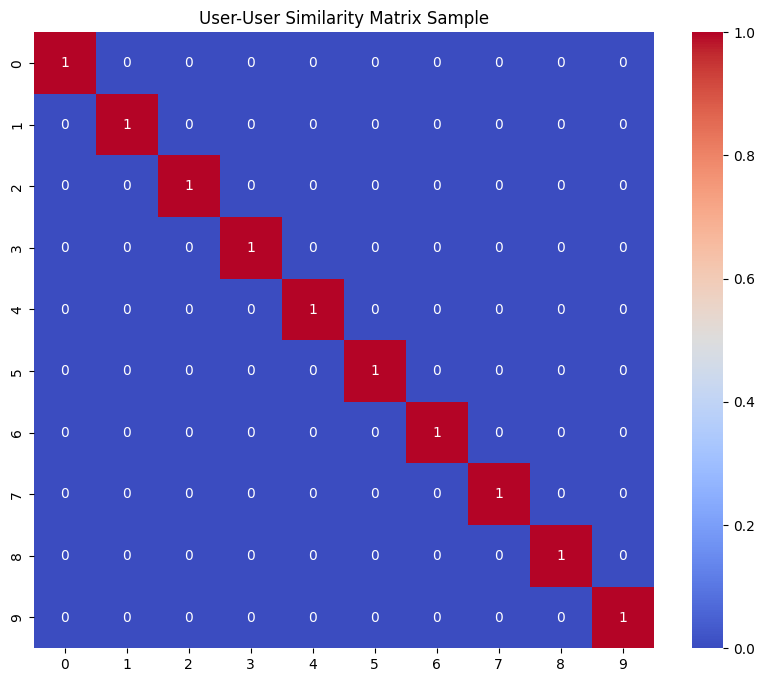

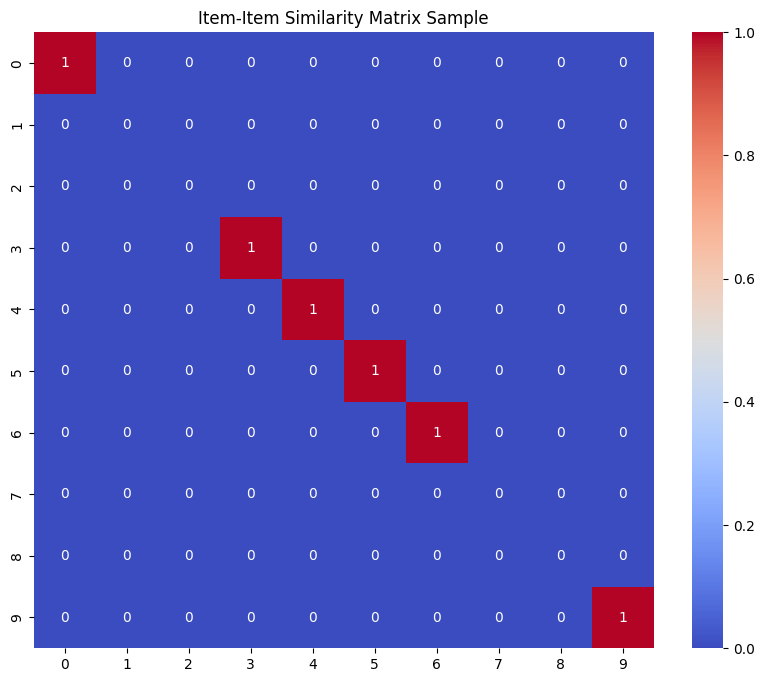

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize a portion of the user-user similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity[:10, :10], annot=True, cmap='coolwarm')
plt.title('User-User Similarity Matrix Sample')
plt.show()

# Visualize a portion of the item-item similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(item_similarity[:10, :10], annot=True, cmap='coolwarm')
plt.title('Item-Item Similarity Matrix Sample')
plt.show()

In [19]:
def get_top_k_user_recommendations(user_id, k, user_similarity, interaction_matrix):
    if user_id not in interaction_matrix.index:
        return []

    # Get the items that the user has not interacted with
    interacted_items = interaction_matrix.loc[user_id]
    interacted_items = interacted_items[interacted_items > 0]  # Assuming binary interaction: 1 for interacted, 0 for not
    unrated_items = interaction_matrix.columns.difference(interacted_items.index)

    predicted_ratings = []
    # Loop over each unrated item
    for item_id in unrated_items:
        # Calculate predicted rating using user similarity scores and user interactions
        user_similarities = user_similarity[interaction_matrix.index.get_loc(user_id)]
        item_interactions = interaction_matrix[item_id].fillna(0)
        numerator = (user_similarities * item_interactions).sum()
        denominator = user_similarities.sum()
        predicted_rating = numerator / denominator if denominator != 0 else 0

        predicted_ratings.append((item_id, predicted_rating))

    # Get top-k items based on predicted ratings
    top_items = [item for item, rating in sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:k]]
    return top_items

In [20]:
def get_top_k_item_recommendations(user_id, k, item_similarity, interaction_matrix):
    if user_id not in interaction_matrix.index:
        return []

    # Get the items the user has interacted with
    interacted_items = interaction_matrix.loc[user_id]
    interacted_items = interacted_items[interacted_items > 0]  # Assuming binary interaction: 1 for interacted, 0 for not

    predicted_ratings = []
    # Loop over each item in the matrix
    for item_id in interaction_matrix.columns:
        # Skip if the user has already interacted with this item
        if interacted_items.get(item_id, 0) > 0:
            continue

        # Calculate predicted rating using item similarity scores and user's interactions
        item_similarities = item_similarity[interaction_matrix.columns.get_loc(item_id)]
        user_ratings = interaction_matrix.loc[user_id].fillna(0)
        numerator = (item_similarities * user_ratings).sum()
        denominator = item_similarities.sum()
        predicted_rating = numerator / denominator if denominator != 0 else 0

        predicted_ratings.append((item_id, predicted_rating))

    # Get top-k items based on predicted ratings
    top_items = [item for item, rating in sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:k]]
    return top_items

In [22]:
user_id = 'FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg='
k = 5

top_k_user_recommendations = get_top_k_user_recommendations(user_id, k, user_similarity, interaction_matrix)
print(f"Top {k} user-user recommendations for user {user_id}: {top_k_user_recommendations}")

Top 5 user-user recommendations for user FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=: ['J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=', '3VkD5ekIf5duJm1hmYTZlXjyl0zqV8wCzuAh3uocfCg=', 'ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=', 'sgHKhG2d57U2o88razl9SyG1nuuMDf0J2BuDhzoI12Y=', 'IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=']


In [23]:
top_k_item_recommendations = get_top_k_item_recommendations(user_id, k, item_similarity, interaction_matrix)
print(f"Top {k} item-item recommendations for user {user_id}: {top_k_item_recommendations}")

Top 5 item-item recommendations for user FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=: ['7FFxzivDxYHUKw8IfsBEWouZ7dDEK2B1G1cwTMLefrQ=', 'B/OaL2ZMPAJ+0yVaJvd+albIobQSugkK5dCwmDMQ5NQ=', 'h6+LQdMxJInTrRPrA2CcSRB8mCjajwlnR8guaPHBAT0=', 'kJAp6vrdPGiHVunoAB5t4cPeMHFSKgf51xcdSITUH1I=', 'svP76OwJ1B4wu4vhryWBgcFhlJzPpScnkmGK5xZKT7U=']


In [25]:
def evaluate_recommendations(reviewerID, k, user_similarity, interaction_matrix, test_interaction_matrix):
    # Ensure reviewerID is in both train and test matrices
    if reviewerID not in interaction_matrix.index or reviewerID not in test_interaction_matrix.index:
        return 0.0, 0.0

    # Get the actual rated products for the user from the test set
    actual_rated_products = test_interaction_matrix.loc[reviewerID]
    actual_rated_products = actual_rated_products[actual_rated_products > 0]  # Assuming binary interaction
    actual_rated_products_set = set(actual_rated_products.index)

    # Get the top-k recommended products for the user
    top_k_recommendations = get_top_k_user_recommendations(reviewerID, k, user_similarity, interaction_matrix)
    top_k_recommendations_set = set(top_k_recommendations)

    # Calculate precision and recall
    intersection = actual_rated_products_set.intersection(top_k_recommendations_set)
    precision = len(intersection) / len(top_k_recommendations_set) if top_k_recommendations_set else 0.0
    recall = len(intersection) / len(actual_rated_products_set) if actual_rated_products_set else 0.0

    return precision, recall

# Example usage


In [32]:
test_known, test_unknown = train_test_split(train, test_size=0.2, random_state=42)

In [40]:
import pandas as pd

# Assuming 'df' is your DataFrame and it has a column named 'target'
# First, calculate the mean of the 'target' column, excluding NaN values
target_mean = test_known['target'].mean()
target_mean = test_unknown['target'].mean()

# Now, fill NaN values in the 'target' column with the calculated mean
test_known['target'] = test_known['target'].fillna(target_mean)
test_unknown['target'] = test_unknown['target'].fillna(target_mean)

In [41]:
# Assuming 'msno' is the user ID and 'song_id' is the item ID
interaction_matrix = test_unknown.pivot_table(index='msno', columns='song_id', values='target', fill_value=0, aggfunc='size')
test_interaction_matrix = test_known.pivot_table(index='msno', columns='song_id', values='target', fill_value=0, aggfunc='size')

In [42]:
def evaluate_recommendations(reviewerID, k, user_similarity, interaction_matrix, test_interaction_matrix):
    if reviewerID not in interaction_matrix.index or reviewerID not in test_interaction_matrix.index:
        return 0.0, 0.0

    # Ensure actual_rated_products is treated as a DataFrame
    actual_rated_products = test_interaction_matrix.loc[[reviewerID]]
    actual_rated_products_set = set(actual_rated_products.columns[actual_rated_products.iloc[0] > 0])

    # Get the top-k recommended products for the user
    top_k_recommendations = get_top_k_user_recommendations(reviewerID, k, user_similarity, interaction_matrix)
    top_k_recommendations_set = set(top_k_recommendations)

    # Calculate precision and recall
    intersection = actual_rated_products_set.intersection(top_k_recommendations_set)
    precision = len(intersection) / len(top_k_recommendations_set) if top_k_recommendations_set else 0.0
    recall = len(intersection) / len(actual_rated_products_set) if actual_rated_products_set else 0.0

    return precision, recall